<a href="https://colab.research.google.com/github/valintea/Entregable-2/blob/main/Entregable2Valentin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El primer paso es importar todas aquellas librerias que nos hagan falta más adelante.

In [13]:
!pip install fastai -Uq

     |████████████████████████████████| 197 kB 12.1 MB/s 
     |████████████████████████████████| 59 kB 7.1 MB/s 


In [14]:
from fastai.vision.all import *
import os
from google.colab import files
from sklearn.model_selection import train_test_split
import shutil

En este notebook se entrenará un clasificador que pueda reconocer a 3 personajes dcel popular manga/anime One Piece, siendo estos personajes Luffy, Zoro y Nami. 




<img src="https://okdiario.com/guiltybit/wp-content/uploads/2022/03/One-Piece-1536x864.webp" alt="Fry, Bender y Leela" style="width: 50px;"/>

Importamos el conjunto de imagenes que vamos a usar.

In [10]:
!wget https://github.com/valintea/Entregable-2/blob/0efc64bbc2753c680a062538d353e07674949071/Zoro.zip?raw=true -O Zoro.zip
!wget https://github.com/valintea/Entregable-2/blob/0efc64bbc2753c680a062538d353e07674949071/Nami.zip?raw=true -O Nami.zip
!wget https://github.com/valintea/Entregable-2/blob/0efc64bbc2753c680a062538d353e07674949071/Luffy.zip?raw=true -O Luffy.zip

--2022-05-23 09:27:13--  https://github.com/valintea/Entregable-2/blob/0efc64bbc2753c680a062538d353e07674949071/Zoro.zip?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/valintea/Entregable-2/raw/0efc64bbc2753c680a062538d353e07674949071/Zoro.zip [following]
--2022-05-23 09:27:13--  https://github.com/valintea/Entregable-2/raw/0efc64bbc2753c680a062538d353e07674949071/Zoro.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/valintea/Entregable-2/0efc64bbc2753c680a062538d353e07674949071/Zoro.zip [following]
--2022-05-23 09:27:13--  https://raw.githubusercontent.com/valintea/Entregable-2/0efc64bbc2753c680a062538d353e07674949071/Zoro.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.19

Descomprimimos los archivos comprimidos en carpetas organizadas por personaje.

In [11]:
!unzip /content/Luffy.zip
!unzip /content/Nami.zip
!unzip /content/Zoro.zip

Archive:  /content/Luffy.zip
   creating: Luffy/
  inflating: Luffy/1.jpg             
  inflating: Luffy/10.jpg            
  inflating: Luffy/100.jpg           
  inflating: Luffy/101.jpg           
  inflating: Luffy/102.jpg           
  inflating: Luffy/103.jpg           
  inflating: Luffy/104.jpg           
  inflating: Luffy/105.jpg           
  inflating: Luffy/106.jpg           
  inflating: Luffy/107.jpg           
  inflating: Luffy/108.jpg           
  inflating: Luffy/109.jpg           
  inflating: Luffy/11.jpg            
  inflating: Luffy/110.jpg           
  inflating: Luffy/111.jpg           
  inflating: Luffy/112.jpg           
  inflating: Luffy/113.jpg           
  inflating: Luffy/114.jpg           
  inflating: Luffy/115.jpg           
  inflating: Luffy/116.jpg           
  inflating: Luffy/117.jpg           
  inflating: Luffy/118.jpg           
  inflating: Luffy/119.jpg           
  inflating: Luffy/12.jpg            
  inflating: Luffy/120.jpg           
 

Verificamos que todas las imagenes puedan ser procesadas, de lo contrario podrias dar fallos de ejecucion. Eliminamos aquellas que puedan dar problemas.

In [17]:
for im in verify_images(get_image_files('/content/Zoro')):
    os.remove(str(im))

In [18]:
for im in verify_images(get_image_files('/content/Nami')):
    os.remove(str(im))

In [19]:
for im in verify_images(get_image_files('/content/Luffy')):
    os.remove(str(im))

Creamos el arbol de directorios en el que residiran los diferentes conjuntos de imagenes(test y train) por cada personaje.

In [15]:
path = Path('data/one_piece')

In [16]:
(path/'train/Luffy').mkdir(parents=True,exist_ok=True)
(path/'train/Zoro').mkdir(parents=True,exist_ok=True)
(path/'train/Nami').mkdir(parents=True,exist_ok=True)
(path/'test/Luffy').mkdir(parents=True,exist_ok=True)
(path/'test/Zoro').mkdir(parents=True,exist_ok=True)
(path/'test/Nami').mkdir(parents=True,exist_ok=True)

Dividimos los conjuntos de imagenes en conjuntos de entrenamiento y test.

In [20]:
trainLuffy, testLuffy = train_test_split(get_image_files('/content/Luffy'),test_size=0.2,random_state=15)
trainNami, testNami = train_test_split(get_image_files('/content/Nami'),test_size=0.2,random_state=15)
trainZoro, testZoro = train_test_split(get_image_files('/content/Zoro'),test_size=0.2,random_state=15)

Movemos las imagenes a sus correspondientes directorios creados anteriromente.

In [21]:
for x in trainLuffy:
  shutil.move(str(x),path/('train/Luffy/'+x.name))

for x in trainNami:
  shutil.move(str(x),path/('train/Nami/'+x.name))

for x in trainZoro:
  shutil.move(str(x),path/('train/Zoro/'+x.name))

for x in testLuffy:
  shutil.move(str(x),path/('test/Luffy/'+x.name))

for x in testNami:
  shutil.move(str(x),path/('test/Nami/'+x.name))

for x in testZoro:
  shutil.move(str(x),path/('test/Zoro/'+x.name))

Borramos los directiorios y ficheros que no vayamos a usar mas.

In [22]:
os.remove('/content/Luffy.zip')
os.remove('/content/Zoro.zip')
os.remove('/content/Nami.zip')

In [23]:
shutil.rmtree('/content/Nami')
shutil.rmtree('/content/Luffy')
shutil.rmtree('/content/Zoro')

Construimos el DataBlock.

In [24]:
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=aug_transforms(size=256,min_scale=0.75))

In [25]:
trainPath = Path('/content/data/one_piece/train')

In [26]:
dls = db.dataloaders(trainPath,bs=256)

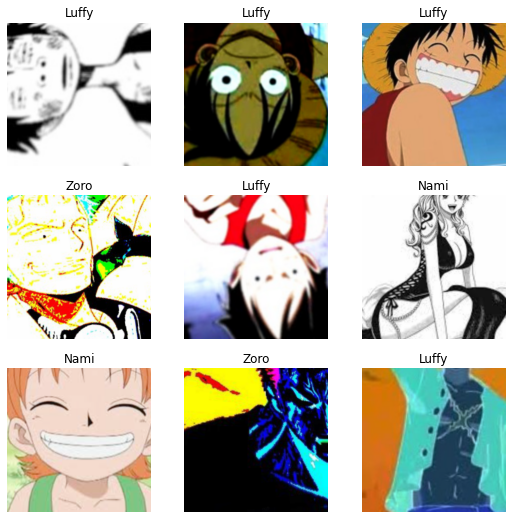

In [27]:
dls.show_batch()

A continuación vamos a crear nuestra red convolucional.

In [28]:
learn = cnn_learner(dls,resnet18,metrics=accuracy).to_fp16()

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Entrenamos la red.

In [29]:
learn.fine_tune(10,base_lr=1e-3)

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.7/dist-packages/torch/cuda/amp/grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


Exportamos.


In [30]:
learn.export()

Creamos el fichero .pkl

In [31]:
Path().ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [32]:
interp = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.7/dist-packages/torch/cuda/amp/grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


Mostramos la matriz de confusión obtenida.

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.7/dist-packages/torch/cuda/amp/grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


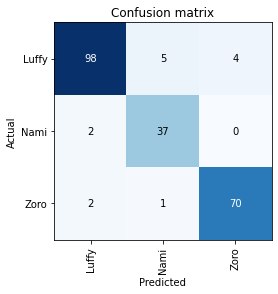

In [33]:
interp.plot_confusion_matrix()

Creamos un nuevo DataBlock para evaluar la red.

In [34]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(256),
                 batch_tfms=aug_transforms(size=128,min_scale=0.75))
dlsTest = dbTest.dataloaders(path,bs=128)

In [35]:
learn.dls = dlsTest

Validamos.

In [36]:
learn.validate()

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.7/dist-packages/torch/cuda/amp/grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


(#2) [2.6164944171905518,0.5236363410949707]

Ahora visualizaremos que imagenes clasifica peor la red.

In [37]:
from fastai.vision.widgets import ImageClassifierCleaner

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.7/dist-packages/torch/cuda/amp/grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


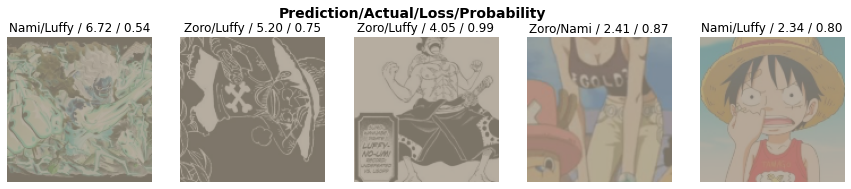

In [38]:
interp.plot_top_losses(5,nrows=1)

Limpiamos el dataset.

In [39]:
from fastai.vision.widgets import ImageClassifierCleaner
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.7/dist-packages/torch/cuda/amp/grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


In [40]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

Exportamos una vez mas.

In [41]:
learn.export()

In [42]:
!ls /content/

data  export.pkl  sample_data


Probamos la red con una imagen de Nami.

In [43]:
!wget https://www.egames.news/__export/1637631064800/sites/debate/img/2021/11/22/elizabeth_rage_en_un_encantador_cosplay_de_nami_de_one_piece.jpg_242310155.jpg -O nami.jpg

--2022-05-23 10:59:09--  https://www.egames.news/__export/1637631064800/sites/debate/img/2021/11/22/elizabeth_rage_en_un_encantador_cosplay_de_nami_de_one_piece.jpg_242310155.jpg
Resolving www.egames.news (www.egames.news)... 18.65.39.21, 18.65.39.17, 18.65.39.125, ...
Connecting to www.egames.news (www.egames.news)|18.65.39.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133637 (131K) [image/jpeg]
Saving to: ‘nami.jpg’

nami.jpg            100%[===================>] 130.50K  --.-KB/s    in 0.009s  

2022-05-23 10:59:09 (14.9 MB/s) - ‘nami.jpg’ saved [133637/133637]



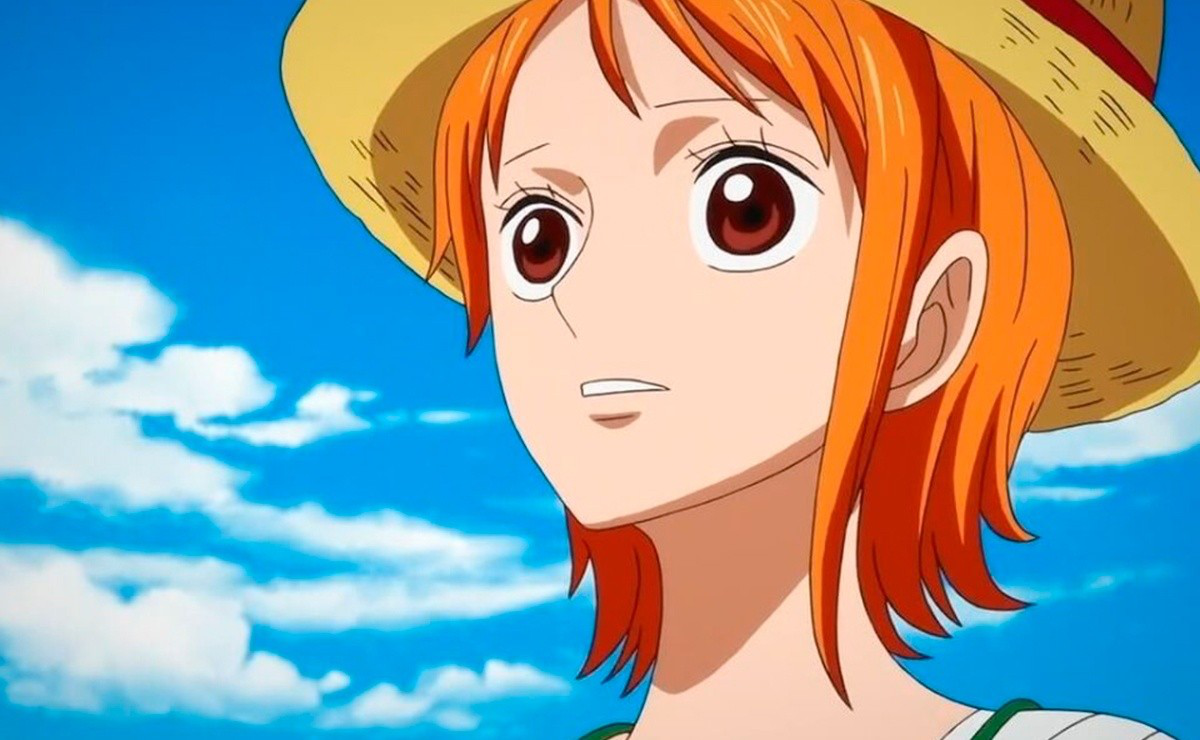

In [45]:
import PIL
img = PILImage.create('nami.jpg')
img

In [46]:
learn_inf = load_learner('export.pkl')

In [47]:
pred_class,pred_idx,outputs=learn_inf.predict(img)
pred_class

'Nami'

Y vemos que la clasifica satisfactoriamente.

Aqui esta el link a mi pagina de Hugging Face.

https://huggingface.co/spaces/valintea/Practica1